# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates the most useful function sklearn-library

What are we covering:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choosing the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a model
7. Putting it all together

## Method to ignore Future warnings
`
import warnings
warnings.filterwarnings("ignore") 
"ignore" to "default" change the argument see the warning again
`

## 0. An end-to-end Scikit-Learn workflow

In [1]:
import numpy as np

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (Feature matrix/variables)
X = heart_disease.drop("target", axis = 1)

# Create Y (labels)
Y = heart_disease["target"]

### Problem Definition : Predicting a person has heart-disease or not. So, it is kind of Classification Problem(Supervised Learning)


### A random forest classifier.

### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeRegressor. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [4]:
# 2 Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameteres
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### clf = RandomForestClassifier(n_estimators = 100); by default
### n_estimators = no. of trees in forest

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# 80% training 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8)

In [6]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ]
executable: /Users/shubhamkumar/MLProject/env/bin/python
   machine: macOS-14.3-arm64-arm-64bit

Python dependencies:
      sklearn: 1.4.0
          pip: 24.0
   setuptools: 69.0.3
        numpy: 1.26.4
        scipy: 1.12.0
       Cython: None
       pandas: 2.2.0
   matplotlib: 3.8.2
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: /Users/shubhamkumar/MLProject/env/lib/libopenblas.0.dylib
        version: 0.3.26
threading_layer: openmp
   architecture: VORTEX

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: libomp
       filepath: /Users/shubhamkumar/MLProject/env/lib/libomp.dylib
        version: None


In [7]:
clf.fit(X_train, Y_train);

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1


# make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

In [9]:
Y_preds = clf.predict(X_test)
Y_preds

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0])

In [10]:
Y_test

90     1
150    1
209    0
208    0
94     1
      ..
188    0
252    0
142    1
56     1
174    0
Name: target, Length: 243, dtype: int64

In [11]:
# 4. Evaluate the model
# training data performance
clf.score(X_train, Y_train) 

1.0

In [12]:
# test data performance
clf.score(X_test, Y_test)

0.7983539094650206

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       108
           1       0.82      0.81      0.82       135

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243



TP = true positive, TN = true negative,
FP = false positive, FP = false negative

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

F1-Score = 2× ((Precision * Recall) / (Precision + Recall)) 

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Confusion Matrix : ((TN, FP),
                    (FN, TP))

In [14]:
confusion_matrix(Y_test, Y_preds)

array([[ 84,  24],
       [ 25, 110]])

In [15]:
accuracy_score(Y_test, Y_preds) 

0.7983539094650206

In [16]:
# 5. Improving Model
# try different type of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Tryin model with {i} estimators...")
    rfc = RandomForestClassifier(n_estimators = i).fit(X_train, Y_train)
    print(f"Model Accuracy on test set: {rfc.score(X_test, Y_test) * 100:.2f}") 
    print("")

Tryin model with 10 estimators...
Model Accuracy on test set: 72.84

Tryin model with 20 estimators...
Model Accuracy on test set: 72.02

Tryin model with 30 estimators...
Model Accuracy on test set: 78.60

Tryin model with 40 estimators...
Model Accuracy on test set: 77.78

Tryin model with 50 estimators...
Model Accuracy on test set: 81.07

Tryin model with 60 estimators...
Model Accuracy on test set: 81.07

Tryin model with 70 estimators...
Model Accuracy on test set: 82.30

Tryin model with 80 estimators...
Model Accuracy on test set: 80.66

Tryin model with 90 estimators...
Model Accuracy on test set: 79.42



In [17]:
# 6. Save a model and load it
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.7983539094650206

## 1. Getting our data ready to be used with machine learning

#### Three main things we have to do:
1. Split the data into features and labels (usually `X` and `Y`)
2. Filling (aka imputing) or disregarding missing values
3. Converting non-numerical to numerical values (aka feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data intoo training and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [24]:
X.shape, Y.shape

((303, 13), (303,))

### 1.1 Make sure data is all numerical

In [25]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [27]:
len(car_sales)

1000

In [28]:
# Split into X/Y
X = car_sales.drop("Price", axis = 1)
Y = car_sales["Price"]

# Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [29]:
# Build Machine Learning Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# fitting the training data into model
model.fit(X_train, Y_train)

# Model Evaluation with test data
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Honda'

In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot, 
                                   categorical_features)],
                                   remainder="passthrough")

# Fit all transformers, transform the data and concatenate results.
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformed_X).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [33]:
X.head(5)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
car_sales["Colour"].value_counts()

Colour
White    407
Blue     321
Black     99
Red       94
Green     79
Name: count, dtype: int64

In [35]:
car_sales["Make"].value_counts()

Make
Toyota    398
Honda     304
Nissan    198
BMW       100
Name: count, dtype: int64

In [36]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

0 -> BMW
1 -> Honda
2 -> Nissan
3 -> Toyota
4 -> Black
5 -> Blue
6 -> Green
7 -> Red
8 -> White
9 -> 3 doors
10 -> 4 doors
11 -> 5 doors
12 -> Odometer

In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [38]:
# let's refill the data
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size = 0.20)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.3235867221569877

In [39]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


### 1.2 What if there is missing vlaues?

1. Fill them with some value (also known as imputation).
2. Remove the sample with missing data altogether.

In [40]:
# Import car_sales missing data
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
# Create X & y (Feature-Labels)

X = car_sales_missing.drop("Price", axis = 1)
Y = car_sales_missing["Price"]

In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
len(car_sales)

1000

In [44]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder = "passthrough")

# Fit all transformers, transform the data and concatenate results.
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill Missing data with pandas

In [45]:
## Fill the "Make" Column
car_sales_missing["Make"].fillna("missing", inplace = True)

## Fill the "Colour" Column
car_sales_missing["Colour"].fillna("missing", inplace = True)

## Fill the "Odometer (KM)" Column
car_sales_missing["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean(), inplace = True)

## Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

/var/folders/km/pw2htq5x23903jc27cqdgrmc0000gn/T/ipykernel_1617/3866634160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace = True)
/var/folders/km/pw2htq5x23903jc27cqdgrmc0000gn/T/ipykernel_1617/3866634160.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [46]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

### Since, we trying the predict the price of the car. So, we left it as it is, without manipulating. Rather than manipulating "Price" column we will drop those rows which have missing price

In [47]:
# Remove rows with missing price columns
car_sales_missing.dropna(inplace = True)
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
# Split the data into X and Y
X = car_sales_missing.drop("Price", axis = 1)
Y = car_sales_missing["Price"]

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [50]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [51]:
pd.get_dummies(car_sales_missing)

,Odometer (KM),Doors,Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,35431.0,4.0,15323.0,False,True,False,False,False,False,False,False,False,True,False
1,192714.0,5.0,19943.0,True,False,False,False,False,False,True,False,False,False,False
2,84714.0,4.0,28343.0,False,True,False,False,False,False,False,False,False,True,False
3,154365.0,4.0,13434.0,False,False,False,True,False,False,False,False,False,True,False
4,181577.0,3.0,14043.0,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820.0,4.0,32042.0,False,False,False,True,False,True,False,False,False,False,False
996,155144.0,3.0,5716.0,False,False,False,False,True,False,False,False,False,True,False
997,66604.0,4.0,31570.0,False,False,True,False,False,False,True,False,False,False,False
998,215883.0,4.0,4001.0,False,True,False,False,False,False,False,False,False,True,False


### Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

### Why do Feature Scaling

- all data of particular column should be in same scale
- 5km and 5000m is differnt in magnitude even though they are same
- `5km and 5m might be treated same by some ML algorithms, and we don't want that`
- So, scale used for measuring magnitude should be same

### Algorithms in which Feature Scaling Matters
- KNN, PCA, Gradient Descent, Tree-Based Model, Linear Discriminant Analysis(LDA),
- Naive Bayes, SVM etc
- In general, whichever algorithm uses distance b/w two data points `(euclidean distance)` feature scaling does matter a lot.


## Feature Scaling Methods in Sklearn'

- There are several common techniques for feature scaling, including standardization, normalization, and min-max scaling.
- Normalization (min-max scaling) using MinMaxScalar class
- Standardization (divides the fature by standard deviation, so that resulting features have 0 mean) using StandardScalar class

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. Also, the scaling of target values is generally not required.

### Option 2: Fill missing values with Sklearn

In [52]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# drop the rows with no labels
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Split into X/Y
X = car_sales_missing.drop("Price", axis = 1)
Y = car_sales_missing["Price"]

In [56]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [57]:
Y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [58]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [59]:
# fill missing values with SKLearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with "mean"
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [60]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [61]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# Feature Encoding
# Let's try and convert our data to numbers
# Turn the categories to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [63]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [64]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y, 
                                                    test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)

# fit training data into model
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.21990196728583944

## BEST WAY TO BUILD A MODEL

In [65]:
# Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [66]:
# fill missing values with SKLearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with "mean"
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

In [67]:
filled_X_train

array([['Nissan', 'White', 4.0, 64362.0],
       ['Nissan', 'missing', 4.0, 206073.0],
       ['Toyota', 'Blue', 4.0, 156478.0],
       ...,
       ['Honda', 'Blue', 4.0, 230570.0],
       ['Toyota', 'Red', 4.0, 193006.0],
       ['Nissan', 'Red', 4.0, 61892.0]], dtype=object)

In [68]:
filled_X_test

array([['Honda', 'White', 4.0, 166028.0],
       ['Nissan', 'Green', 3.0, 190794.0],
       ['Nissan', 'Red', 4.0, 128235.0],
       ['Toyota', 'Blue', 4.0, 223390.0],
       ['Honda', 'White', 4.0, 130783.0],
       ['Nissan', 'White', 4.0, 82726.0],
       ['Toyota', 'White', 4.0, 189194.0],
       ['Toyota', 'White', 4.0, 188338.0],
       ['Toyota', 'White', 4.0, 26191.0],
       ['Honda', 'Blue', 4.0, 63825.0],
       ['BMW', 'White', 5.0, 143651.0],
       ['Honda', 'Blue', 4.0, 73869.0],
       ['Toyota', 'White', 4.0, 129815.26104972376],
       ['Toyota', 'White', 4.0, 72118.0],
       ['Honda', 'White', 4.0, 42844.0],
       ['Nissan', 'missing', 4.0, 219137.0],
       ['Honda', 'Blue', 4.0, 68223.0],
       ['Toyota', 'Blue', 4.0, 225286.0],
       ['Honda', 'White', 4.0, 82039.0],
       ['Honda', 'White', 4.0, 95481.0],
       ['Toyota', 'Blue', 4.0, 129815.26104972376],
       ['Nissan', 'White', 4.0, 192747.0],
       ['BMW', 'Red', 5.0, 131587.0],
       ['Honda', 'Blue

In [69]:
car_sales_train_X = pd.DataFrame(filled_X_train,
                                 columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_test_X = pd.DataFrame(filled_X_test,
                                columns  = ["Make", "Colour", "Doors", "Odometer (KM)"])


In [70]:
car_sales_train_X.head()

,Make,Colour,Doors,Odometer (KM)
0,Nissan,White,4.0,64362.0
1,Nissan,missing,4.0,206073.0
2,Toyota,Blue,4.0,156478.0
3,Nissan,White,4.0,87997.0
4,Toyota,missing,4.0,228619.0


In [71]:
car_sales_test_X.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,166028.0
1,Nissan,Green,3.0,190794.0
2,Nissan,Red,4.0,128235.0
3,Toyota,Blue,4.0,223390.0
4,Honda,White,4.0,130783.0


In [72]:
# Feature Encoding (convert non-numerical data to numerical data)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X_train = transformer.fit_transform(car_sales_train_X)
transformed_X_test = transformer.transform(car_sales_test_X)

transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.43620e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.06073e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.56478e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.30570e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.93006e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.18920e+04]])

In [73]:
# Model Fitting and Evaluation
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Model Setup
model = RandomForestRegressor()

# Fitting the training data
model.fit(transformed_X_train, Y_train)

# Model Evaluation
model.score(transformed_X_test, Y_test)

0.3260131242495673

## 2. Choosing the right estimator/algorithm for the problem

Some things to note:

* Sklearn refers to machine learning models, algorithm as estimatos.
* Classification problem - predicting a category (heart diesase or not)
    * Sometimes `clf` can be seen as short form of classifier
* Regression problem = predicting a number (selling price of a car)

<img src = "https://scikit-learn.org/stable/_static/ml_map.png">

### 2.1 Picking a machine learning model for a regression problem
Let's use the California Housing Dataset. 
Read about dataset: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [74]:
# get c/a housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [75]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [76]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [77]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [78]:
housing_df = housing_df.drop("MedHouseVal", axis = 1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [79]:
# import algorithm/estimator
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"] # median house price in $100,000s

# Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Instantize and fit the model (on training data set)
model = Ridge()
model.fit(X_train, Y_train)

# Check the score of model on test set
model.score(X_test, Y_test)

0.5758549611440122

In [80]:
## let's try this with LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

# split the data into train and test test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Instantize and fit the model (on training set)
model = LinearRegression()
model.fit(X_train, Y_train)

# Model Evaluation
model.score(X_test, Y_test)

0.5757877060324511

In [81]:
## let's try out another model (lasso regression)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

# split the data into train and test test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Instantize and fit the model (on training set)
model = Lasso(alpha = 0.1)
model.fit(X_train, Y_train)

# Model Evaluation
model.score(X_test, Y_test)

0.5318167610318159

In [82]:
## let's try out Ridge-Cross-Validation model
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

# split the data into train and test test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Instantize and fit the model (on training set)
model = RidgeCV()
model.fit(X_train, Y_train)

# Model Evaluation
model.score(X_test, Y_test)

0.5764371557382573

In [83]:
## let's try out BayesianRidge model
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

# split the data into train and test test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Instantize and fit the model (on training set)
model = BayesianRidge()
model.fit(X_train, Y_train)

# Model Evaluation
model.score(X_test, Y_test)

0.576020635350555

In [84]:
# Using SGDRegressor as Model and StandardScaler for Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# setup random seed
np.random.seed(42)

# split the data into train and test test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
est = make_pipeline(StandardScaler(), SGDRegressor(loss = 'squared_error'))
est.fit(X_train, Y_train)
est.score(X_test, Y_test)

0.5846517276218621

What if `Ridge and other models` didn't work or the score didn't fit our needs?

Well, we could always try a differnet model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make predictions and than just a single model)?

Sklearn's ensemble models can be found here: <link>https://scikit-learn.org/stable/modules/ensemble.html</link>

In [85]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

# split the data into train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# instantize and fit the model (on training set)
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Check the score of the model (on the test set)
model.score(X_test, Y_test)

0.8059809073051385

In [86]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
# Let's try tuning hyperparameters

# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

# split the data into train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

for i in range(10, 101, 10):
    # instantize and fit the model (on training set)
    model = RandomForestRegressor(n_estimators = i)
    model.fit(X_train, Y_train)
    
    # Check the score of the model (on the test set)
    print(model.score(X_test, Y_test))

0.7851752292818259
0.7957333006393108
0.8013955778016778
0.8022259225750528
0.8023903663982276
0.8041790304668666
0.8065599186561039
0.806860270657419
0.8062806967223503
0.8075750850731847


In [88]:
from sklearn.metrics import mean_squared_error
Y_predict = model.predict(X_test)

(mean_squared_error(Y_test, Y_predict)/len(Y_predict)) ** 0.5

0.007815634427926089

In [89]:
Y_predict

array([0.48981  , 0.72094  , 4.8560661, ..., 4.856659 , 0.71992  ,
       1.62578  ])

In [90]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

# Classification Model Building Challenges

In [91]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [92]:
# adding features to data frame
cancer_df = pd.DataFrame(breast_cancer["data"], columns = breast_cancer["feature_names"])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [93]:
# adding target column to dataframe
# target = 0 => malignant(life-threatening) and 1 => benign(harmless)
cancer_df["target"] = pd.DataFrame(breast_cancer["target"])
cancer_df.head(25)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0


In [94]:
# Split the data into X and y
X = cancer_df.drop("target", axis = 1)
y = cancer_df["target"]

In [95]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### SVC Model

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# setup random seed
np.random.seed(42)

# split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# setup model
model = SVC()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9824561403508771

### NaiveBayes Model

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# setup random seed
np.random.seed(42)

# split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# setup model
model = GaussianNB()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9649122807017544

### KNN Classifier Model

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# setup random seed
np.random.seed(42)

# split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# setup model
model = KNeighborsClassifier(n_neighbors = 2, metric = "minkowski", p = 2)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9385964912280702

In [99]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
len(heart_disease)

303

Consulting the model map and it says to try `LinearSVC`

In [101]:
# import the LinearSVC
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# Make the data into X/y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data into t and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# Model setup and training
clf = LinearSVC(dual = "auto")
clf.fit(X_train, Y_train)

# Model evaluation
clf.score(X_test, Y_test)

0.8688524590163934

In [102]:
# import the logisticRegression for classification
from sklearn.linear_model import LogisticRegression

# setup random seed
np.random.seed(42)


# Make the data into X/y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]


# Split the data into t and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# Scaling data is required for logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaler_train = sc.fit(X_train)
scaler_test = sc.fit(X_test)

X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

# Model setup and training
clf = LogisticRegression()
clf.fit(X_train_scaled, Y_train)

# Model evaluation
clf.score(X_test_scaled, Y_test)

0.8524590163934426

In [103]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [104]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data into X/y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# Model setup and training
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Model evaluation
clf.score(X_test, Y_test)

0.8524590163934426

## Trying LogisticRegression with StandardScaler using pipeline

In [105]:
# importing necessity
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# make the data into X/y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the test and train set
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

# Make pipeline to serve scaled data to model
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train) # apply scaling

# Model Evaluation
pipe.score(X_test, Y_test)

0.881578947368421

## Tidbit:
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or 
       transfer learning

## 3. Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the data

* X = features, feature variables, data
* y = labels, target, target variables

In [106]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data into X/y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# Model setup and training
clf = RandomForestClassifier()

# Model Fitting
clf.fit(X_train, Y_train)

# Model evaluation
clf.score(X_test, Y_test)

0.8524590163934426

In [107]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [108]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:

* `predicr()`
* `predict_proba()` 

In [109]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [110]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [111]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [112]:
# Compare predictions to truth labels to evaluate the model
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)

0.8524590163934426

In [113]:
clf.score(X_test, Y_test)

0.8524590163934426

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [115]:
# predict_proba() return probabilities of classification models being true
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [116]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [117]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [118]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [119]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# create model instance
model = RandomForestRegressor()

# Model fitting
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [121]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [122]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [123]:
len(y_preds), len(y_test)

(4128, 4128)

In [124]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [125]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate the Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

Read more about these methods here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating the model with `score` method

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X/y
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

# create train/test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Model initialization
clf = RandomForestClassifier(n_estimators = 1000)

# Fit classifier to training data
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [127]:
# The highest score for the .score() is 1.0 and lower is 0.0
clf.score(X_train, Y_train)

1.0

In [128]:
clf.score(X_test, Y_test)

0.8688524590163934

Let's use `score()` on Regression problem

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X/y
X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

# create train/test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Model initialization
model = RandomForestRegressor(n_estimators = 100)

# Fit classifier to training data
model.fit(X_train, Y_train)

RandomForestRegressor()

In [130]:
model.score(X_train, Y_train)

0.973652044608591

In [131]:
model.score(X_test, Y_test)

0.8059809073051385

### 4.2 Evaluating a model using `scoring` parameter

In [132]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X/y
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

# create train/test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Model initialization
clf = RandomForestClassifier(n_estimators = 100)

# Fit classifier to training data
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [133]:
clf.score(X_test, Y_test)

0.8524590163934426

In [134]:
# cv = no. of cross_validation iteration used
cross_val_score(clf, X, Y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [135]:
cross_val_score(clf, X, Y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [136]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, Y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, cv = 5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### Default scoring parameter of classifier = mean accuracy
clf.score()

In [137]:
# scoring parameter set to none by default
cross_val_score(clf, X, Y, cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

### Accuracy

In [138]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv = 5)

In [140]:
np.mean(cross_val_score)

0.8248087431693989

In [141]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f} %")

Heart Disease Classifier Cross-Validated Accuracy: 82.48 %


**Area under the reciever operating characteristics curve(AUC/ROC)**
* Area under curve(AUC)
* ROC Curve

ROC curves are a comparision of a model's true positive rate(tpr) versus a models false postive rate(fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [142]:
# Create train, test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [143]:
from sklearn.metrics import roc_curve

# fit the class
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.11, 0.89],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [144]:
# Keep positive probability only
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [145]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

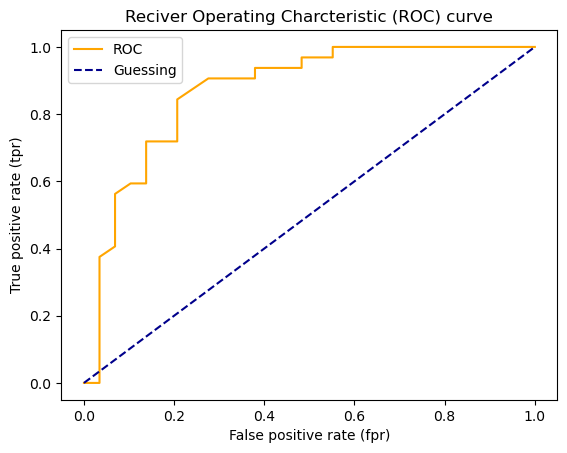

In [146]:
# Create function to plot the ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve for given false positive rate(fpr)
    and true positive rate(tpr) of a model.
    """

    # Plot ROC-curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], 
             color = "darkblue", 
             linestyle="--", 
             label = "Guessing")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciver Operating Charcteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [147]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8696120689655172

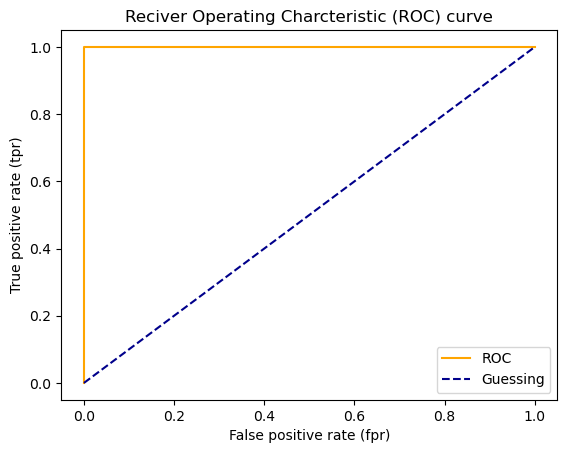

In [148]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [149]:
# Prefect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suposed to predict.

In essence, giving you an idea of where the model is getting confused

In [150]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [151]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


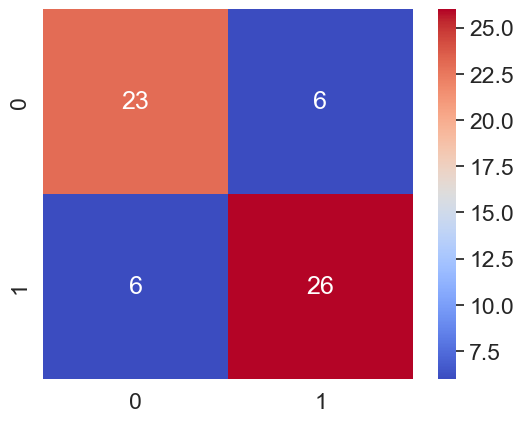

In [152]:
# Make confusion matrix visualization uisng Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat, cmap = 'coolwarm', square = True, annot = True);

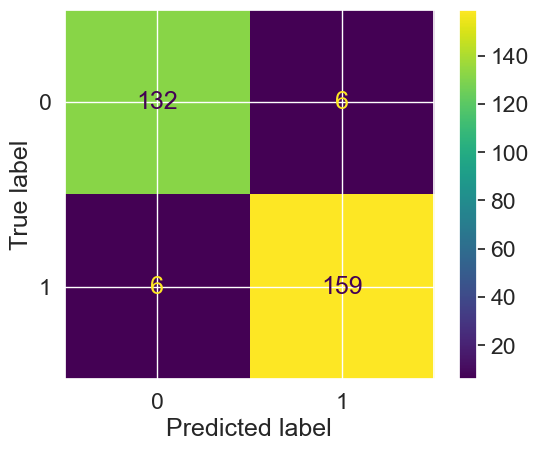

In [153]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X = X, y = y)

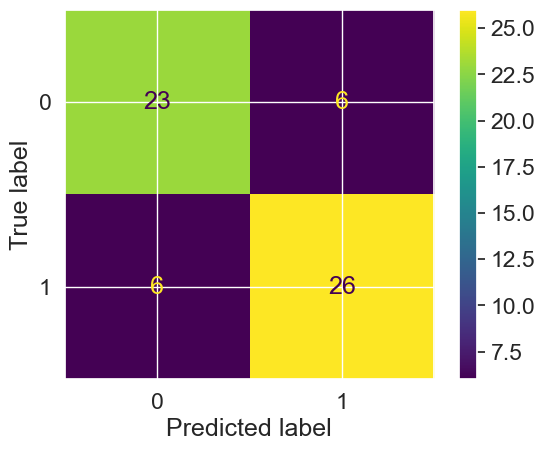

In [154]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds)

In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### Metrics based on Confusion Matrix Data

<img src = "https://www.researchgate.net/profile/Md-Mosharaf-Hossain-2/publication/305297828/figure/fig1/AS:716299441299456@1547790503713/Confusion-matrix-and-common-performance-metrics-calculated-from-it.ppm">

In [156]:
y_train.value_counts()

target
1    133
0    109
Name: count, dtype: int64

### 4.2.2 Regression model evaluation metrics

The ones which are covered:
1. $R^2$ (coeffecient of determination)
2. Mean Absolute Error
3. Mean Squared Error

In [157]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [158]:
model.score(X_test, y_test)

0.8059809073051385

In [159]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [160]:
y_test.mean()

2.0550030959302323

In [161]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [162]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [163]:
r2_score(y_true = y_test,
         y_pred = y_test_mean)

0.0

In [164]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

In [165]:
y_preds = model.predict(X_test)

In [166]:
r2_score(y_true = y_test,
         y_pred = y_preds)

0.8059809073051385

**Mean Absolute Error (MAE)**

MAE is the average of abs. diff. b/w predictions and actual values

x = x +/- mae

In [167]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_true = y_test,
                          y_pred = y_preds)
mae

0.3270458119670544

In [168]:
df = pd.DataFrame(data = {"actual values" :  y_test,
                          "predicted values" : y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [169]:
np.abs(df["differences"]).mean()

0.3270458119670544

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [170]:
# Mean Squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [171]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [172]:
df["squared_differences"].mean()

0.2542443610174998

In [173]:
df_large_error = df.copy(deep = True)
df_large_error.iloc[0]["squared_differences"] = 16

/var/folders/km/pw2htq5x23903jc27cqdgrmc0000gn/T/ipykernel_1617/3116835734.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [174]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [175]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25812028533523235

In [176]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [177]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.7342642968470183

<img src = "https://www.researchgate.net/profile/Md-Mosharaf-Hossain-2/publication/305297828/figure/fig1/AS:716299441299456@1547790503713/Confusion-matrix-and-common-performance-metrics-calculated-from-it.ppm">

1. Recall = TP/(TP + FN)
2. Precision = TP/(TP + FP)
3. F1(F-Score) = HarmonicMean(Recall, Precision)

### 4.2.3 Finally use the `scoring` parameter

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

In [179]:
np.random.seed(42)

# Cross-Validation accuracy
# if @param scoring = None in cross_val_score, then default scoring parameter is used 
# for classification problems, @param scoring = accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [180]:
# Cross-validated accuracy
print(f"The corss-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The corss-validated accuracy is: 82.48%


In [181]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [182]:
# Cross-validated accuracy
print(f"The corss-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The corss-validated accuracy is: 82.48%


In [183]:
# precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [184]:
# Cross-validated precision
print(f"The corss-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The corss-validated precision is: 83.30%


In [185]:
# recall
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [186]:
# Cross-validated recall
print(f"The corss-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The corss-validated recall is: 85.45%


### Let's use `scoring` method for regressor problem

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

model = RandomForestClassifier(n_estimators = 100)

In [188]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 5, scoring = None)
np.mean(cv_r2)

0.8248087431693989

In [189]:
cv_r2

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [190]:
# Mean Squared Error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.17519125683060108

In [191]:
cv_mse

array([-0.18032787, -0.09836066, -0.16393443, -0.21666667, -0.21666667])

In [192]:
# Mean Absolute Error
cv_mae = cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.1981967213114754

In [193]:
cv_mae

array([-0.21311475, -0.13114754, -0.19672131, -0.21666667, -0.23333333])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators using the `sklearn.metrics` module

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Model
clf = RandomForestClassifier(random_state = 42)

# Fit the model
clf.fit(X_train, y_train)

# Model prediction
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds) * 100:.2f}%")
print(f"f1_score: {f1_score(y_test, y_preds) * 100:.2f}%")
print(f"f1_score_weighted: {f1_score(y_test, y_preds, average = 'weighted') * 100:.2f}%")
print(f"f1_score_micro: {f1_score(y_test, y_preds, average = 'micro') * 100:.2f}%")
print(f"f1_score_macro: {f1_score(y_test, y_preds, average = 'macro') * 100:.2f}%")

Classifier metrics on the test set
Accuracy: 83.61%
Precision: 84.38%
Recall: 84.38%
f1_score: 84.38%
f1_score_weighted: 83.61%
f1_score_micro: 83.61%
f1_score_macro: 83.57%


In [195]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [196]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [197]:
test_preds_df = pd.DataFrame(X_test)
test_preds_df["target"] = pd.DataFrame(y_test)
test_preds_df["predicted"] = pd.DataFrame(np.array(y_preds))
test_preds_df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predicted
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,NaN
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,NaN
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,NaN
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,NaN
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0.0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,0.0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,NaN
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,NaN
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,NaN
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1,0.0


In [198]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X & y
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Model
reg = RandomForestRegressor(random_state = 42)

# Fit the model
reg.fit(X_train, y_train)

# Model Predictions
y_preds = reg.predict(X_test)

# Evaluate model using evaluation functions
print("Regressor metrics on the test set")
print(f"r2_score: {r2_score(y_test, y_preds)}")
print(f"mean_absolute_error: {mean_absolute_error(y_test, y_preds)}")
print(f"mean_squared_error: {mean_squared_error(y_test, y_preds)}")
print(f"mean_absolute_precentage_error: {mean_absolute_percentage_error(y_test, y_preds) * 100 :.2f}%")

Regressor metrics on the test set
r2_score: 0.8048502475905297
mean_absolute_error: 0.3275993549176358
mean_squared_error: 0.2557259876588585
mean_absolute_precentage_error: 18.94%


## 5. Improving a Model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, more the data, better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [199]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets of data - training, validation and test

We're going to try and adjust these parameters for DecisionTree Algorithms:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [200]:
def evaluate_preds(y_true, y_preds):
    """
    Perfoms evaluation comparision on y_true labels vs. y_preds labels
    on a classification
    """

    accurate = accuracy_score(y_true, y_preds)
    precise = precision_score(y_true, y_preds)
    recalled = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accurate, 2),
                   "precision": round(precise, 2),
                   "recall": round(recalled, 2),
                   "f1": round(f1, 2)}

    print(f"Accuracy: {accurate * 100:.2f}")
    print(f"Precision: {precise:.2f}")
    print(f"Recall: {recalled:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [202]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shufftle the data
heart_disease_shufftled = heart_disease.sample(frac = 1)

# Split the data into X/y
X = heart_disease_shufftled.drop("target", axis = 1)
y = heart_disease_shufftled["target"]

# Split the data into train, validation and test set

# test_val = 0.3 test, val = 0.3 * 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5)

# Model instantization
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline Prdictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on vaidation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.61
Precision: 0.86
Recall: 0.86
F1 score: 0.86


{'accuracy': 0.83, 'precision': 0.86, 'recall': 0.86, 'f1': 0.86}

In [203]:
np.random.seed(42)

# create a second classifier with differnt hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 200)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd Classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 86.96
Precision: 0.87
Recall: 0.93
F1 score: 0.90


In [204]:
np.random.seed(42)

# create a second classifier with differnt hyperparameters
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 2nd Classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 89.13
Precision: 0.88
Recall: 0.97
F1 score: 0.92


In [205]:
clf_3.score(X_test, y_test)

0.7555555555555555

In [206]:
clf_2.score(X_test, y_test)

0.7555555555555555

In [207]:
clf.score(X_test, y_test)

0.7555555555555555

### 5.2 Hyperparameters tuning with RandomizedSearchCV

In [208]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 50, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X/y
X = heart_disease_shufftled.drop("target", axis = 1)
y = heart_disease_shufftled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantize RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = 2)


# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200

/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    val

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [209]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [210]:
# Let's make predictions witht the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 83.61
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### 5.3 Hyperparametes tuning with GridSearchCV

In [212]:
grid

{'n_estimators': [10, 50, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [214]:
6*5*2*3*3*5 # search done in GridSearchCV (Brute Force: searches every combos)

2700

In [215]:
# reduce the grid combos
grid_2 = {'n_estimators': [100, 200, 500, 1000],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [2, 4]}

In [217]:
4 * 1 * 2 * 2 * 2 * 5 # total combos reduced to 

160

In [233]:
# To compare two models, we should use same data
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Instantize RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid_2,
                      cv = 5,
                      verbose = 2)


# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4,

/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    va

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [234]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [235]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 83.61
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### Let's compare our differnet models metrics

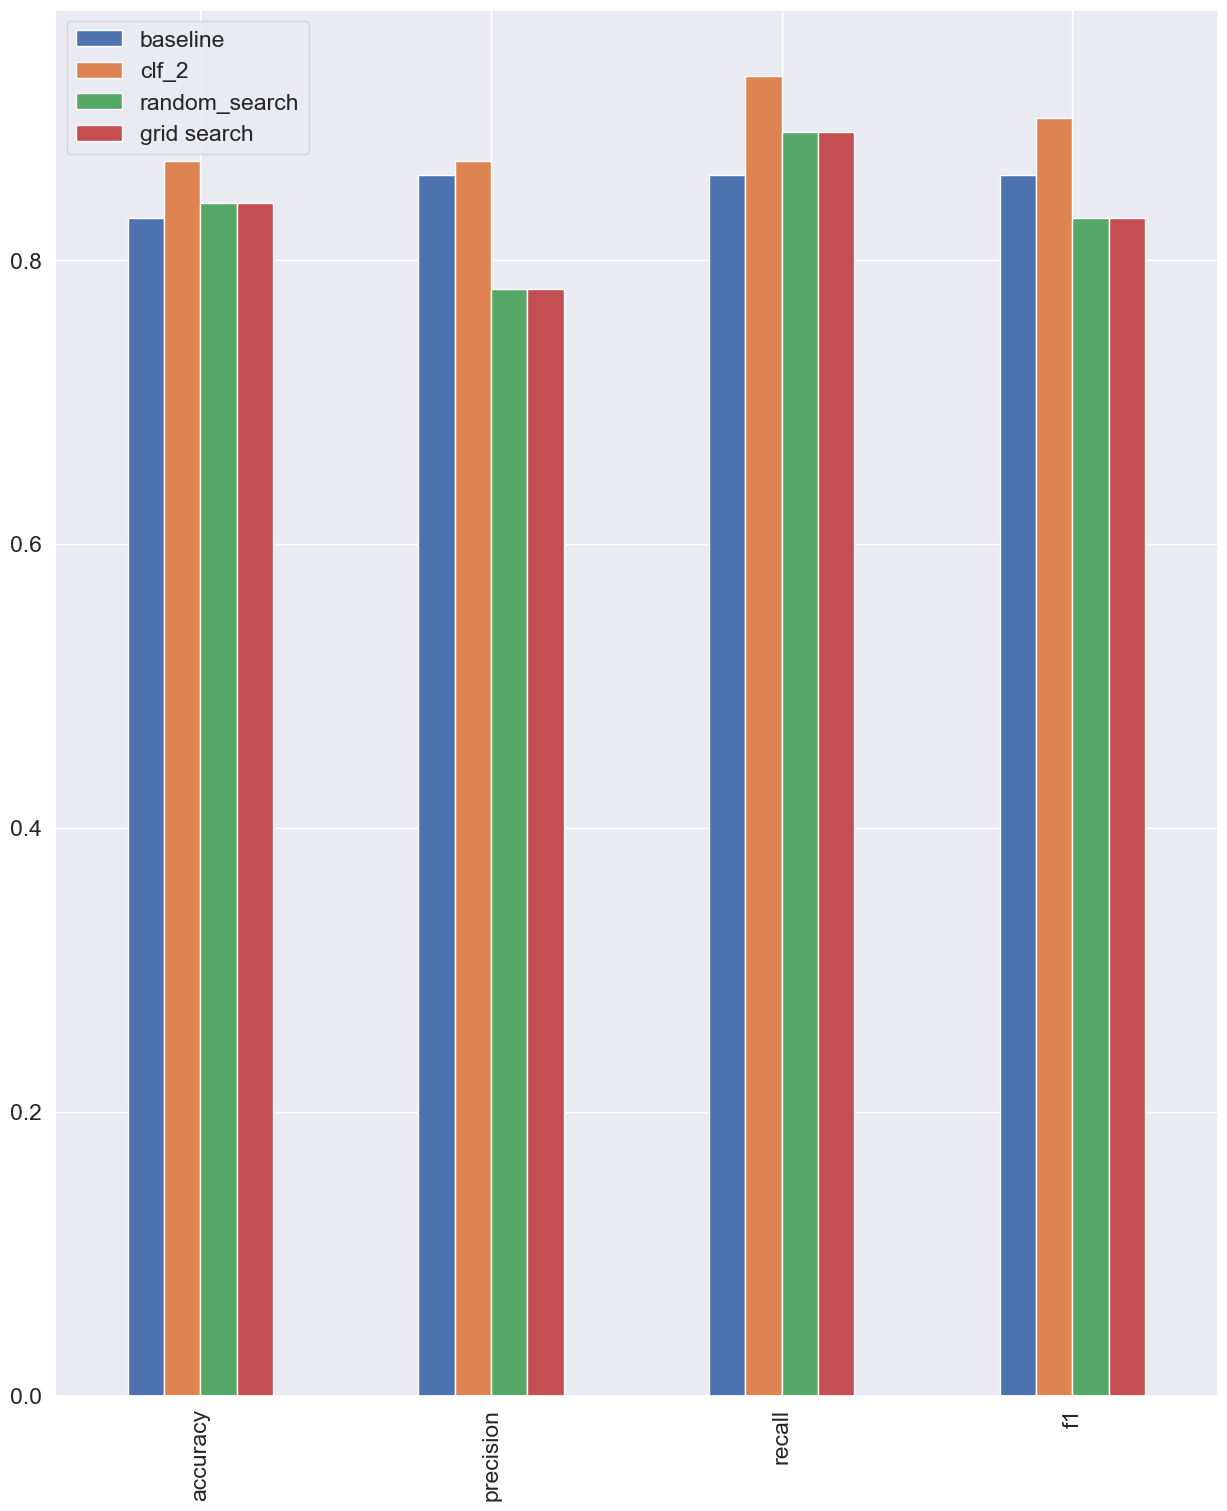

In [236]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random_search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize = (15, 18));

# Comparing the metrics of different Scikit-Learn models

One of the most important things when comparing different models is to make sure they're compared on the same data splits.

For example, let's say you have `model_1` and `model_2` which each differ slightly.

If you want to compare and evaluate their results, `model_1` and `model_2` should both be trained on the same data (e.g. `X_train` and `y_train`) and their predictions should each be made on the same data, for example:
* `model_1.fit(X_train, y_train)` -> `model_1.predict(X_test)` -> `model_1_preds`
* `model_2.fit(X_train, y_train)` -> `model_2.predict(X_test)` -> `model_2_preds`

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

This short notebook compares 3 different models on a small dataset.
1. A baseline `RandomForestClassifier` (all default parameters)
2. A `RandomForestClassifier` tuned with `RandomizedSearchCV` (and `refit=True`)
3. A `RandomForestClassifier` tuned with `GridSearchCV` (and `refit=True`)

The most important part is they all use the same data splits created using `train_test_split()` and `np.random.seed(42)`.

In [237]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

# Split into X & y
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Make evaluation function

Our evaluation function will use all of the major classification metric functions from Scikit-Learn.

In [238]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [239]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## Baseline model
Create model with default hyperparameters. See [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation for more.

In [240]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [241]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    val

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [242]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [243]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


## GridSearchCV
Find best hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

**Note:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit=True`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`. See the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html) for more.

In [244]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/shubhamkumar/MLProject/env/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    va

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [245]:
# Find best parameters of GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [246]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


## Compare metrics
Compare all of the found metrics between the models.

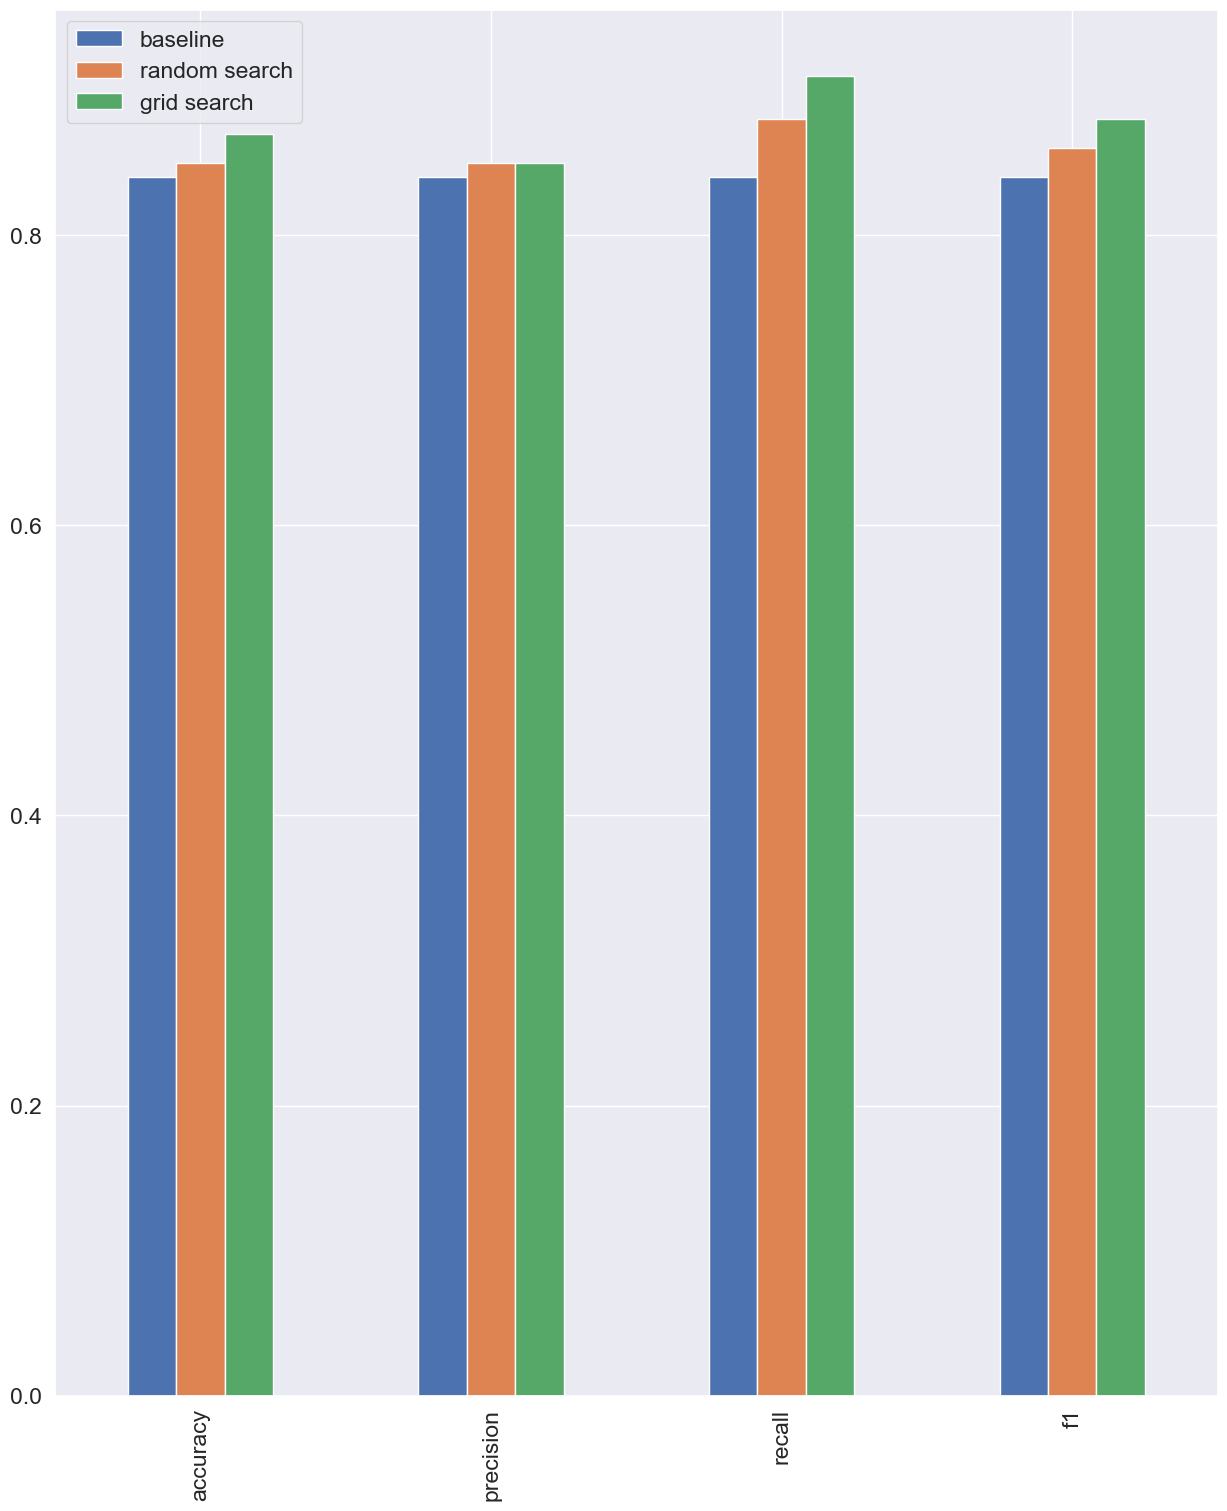

In [251]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(15, 18));